In [55]:
import os
import glob
import pandas as pd
import chardet

In [59]:
ata_folder = "data/"
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
dataframes = {}

for year in years:
    file_path = os.path.join(data_folder, f"EMPLOYEE_EARNINGS_REPORT_{year}.csv")
    if os.path.exists(file_path):
        try:
            with open(file_path, 'rb') as f:
                raw_data = f.read()
                result = chardet.detect(raw_data)
                encoding = result['encoding']
            df = pd.read_csv(file_path, encoding=encoding)
            dataframes[year] = df
            print(f"Successfully loaded {file_path} with encoding: {encoding}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File for year {year} does not exist.")


Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2011.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2012.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2013.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2014.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2015.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2016.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2017.csv with encoding: UTF-8-SIG
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2018.csv with encoding: ISO-8859-1
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2019.csv with encoding: ascii
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2020.csv with encoding: ISO-8859-1
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2021.csv with encoding: ISO-8859-1
Successfully loaded data/EMPLOYEE_EARNINGS_REPORT_2022.csv with encoding: utf

In [60]:
#print the data type of each column
for year, df in dataframes.items():
    print(f"\nData types for {year}:")
    print(df.dtypes)

# display random 10 rows from 2023
if 2012 in dataframes:
    print("\nSample data from 2021:")
    display(dataframes[2012].sample(10))


Data types for 2011:
_id                 int64
Name               object
Department Name    object
Title              object
Regular            object
Retro              object
Other              object
Overtime           object
Injured            object
Detail             object
Quinn              object
Total Earnings     object
Zip Code           object
dtype: object

Data types for 2012:
_id                int64
NAME              object
DEPARTMENT        object
TITLE             object
REGULAR           object
RETRO             object
OTHER             object
OVERTIME          object
INJURED           object
DETAIL            object
QUINN             object
TOTAL EARNINGS    object
ZIP               object
dtype: object

Data types for 2013:
_id                int64
NAME              object
TITLE             object
DEPARTMENT        object
REGULAR           object
RETRO             object
OTHER             object
OVERTIME          object
INJURED           object
DETAIL            

,_id,NAME,DEPARTMENT,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
3581,3582,"Tinlin,Thomas J.",Transportation Department,Commissioner (T&P),$113299.94,$0.00,$4357.70,$0.00,$0.00,$0.00,$0.00,$117657.64,02127-3044
7069,7070,"Hunter,Edward R",Boston Police Department,Jr Building Custodian,$37340.46,$301.75,$1598.94,$3060.66,$0.00,$0.00,$0.00,$42301.81,02128-1441
11046,11047,"Charles,Marjorie Kathleen",Boston Public Schools,Manager (C) (non-ac),$86577.59,$0.00,$240.00,$0.00,$0.00,$0.00,$0.00,$86817.59,02122-2456
10403,10404,"Fisher,Larry",Boston Public Schools,Cab Monitor,$18006.57,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$18006.57,02186-1698
5105,5106,"McCarthy,Michael James",Boston Fire Department,Fire Fighter,$82103.74,$0.00,$550.00,$21817.86,$0.00,$264.00,$0.00,$104735.60,02128-2240
2849,2850,"Walker,Catherine",Property Management,Jr Building Custodian,$36391.85,$170.66,$836.02,$280.16,$0.00,$0.00,$0.00,$37678.69,2136
11460,11461,"Henderson Jr.,Gustavo A",Boston Public Schools,One to One Para,$38866.43,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$38866.43,02136-1127
11133,11134,"Faioes,Sandra B",Boston Public Schools,Teacher,$44824.86,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$44824.86,02072-3909
20499,20500,"Joseph-Allen,Jennifer L.",Boston Public Schools,Substitute Teacher,$18497.57,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$18497.57,02124-1951
8211,8212,"Salem,Jeanne B",Boston Police Department,School Traffic Supv,$10070.95,$80.89,$485.00,$0.00,$0.00,$0.00,$0.00,$10636.84,02136-1645


In [81]:
def unify_columns(df, year):
    df = df.copy()

    if '_id' in df.columns:
        df = df.drop('_id', axis=1)

    column_map = {
        'Name': 'NAME',

        'Department Name': 'DEPARTMENT_NAME',
        'DEPARTMENT': 'DEPARTMENT_NAME',
        'DEPARTMENT NAME': 'DEPARTMENT_NAME',

        'Title': 'TITLE',

        'Regular': 'REGULAR',

        'Retro': 'RETRO',

        'Other': 'OTHER',

        'Overtime': 'OVERTIME',

        'Injured': 'INJURED',

        'Detail': 'DETAIL',
        'DETAILS': 'DETAIL',

        'Total Earnings': 'TOTAL_GROSS',
        'TOTAL EARNINGS': 'TOTAL_GROSS',
        ' TOTAL EARNINGS ': 'TOTAL_GROSS',
        'TOTAL_ GROSS': 'TOTAL_GROSS',
        'TOTAL GROSS': 'TOTAL_GROSS',
        'TOTAL_GROSS': 'TOTAL_GROSS',

        'Quinn': 'QUINN_EDUCATION',
        'QUINN': 'QUINN_EDUCATION',
        'QUINN/EDUCATION INCENTIVE': 'QUINN_EDUCATION',
        ' QUINN/EDUCATION INCENTIVE ': 'QUINN_EDUCATION',
        ' QUINN / EDUCATION INCENTIVE ': 'QUINN_EDUCATION',
        'QUINN_EDUCATION_INCENTIVE': 'QUINN_EDUCATION',

        'Zip Code': 'POSTAL',
        'ZIP': 'POSTAL',

        ' REGULAR ': 'REGULAR',
        ' RETRO ': 'RETRO',
        ' OTHER ': 'OTHER',
        ' OVERTIME ': 'OVERTIME',
        ' INJURED ': 'INJURED',
        ' DETAIL ': 'DETAIL'
    }

    df = df.rename(columns=column_map)

    standard_columns = [
        'NAME',
        'DEPARTMENT_NAME',
        'TITLE',
        'REGULAR',
        'RETRO',
        'OTHER',
        'OVERTIME',
        'INJURED',
        'DETAIL',
        'QUINN_EDUCATION',
        'TOTAL_GROSS',
        'POSTAL'
    ]

    for col in standard_columns:
        if col not in df.columns:
            df[col] = pd.NA

    df = df[standard_columns]

    return df

unified_dataframes = {}
for year, df in dataframes.items():
    try:
        unified_df = unify_columns(df, year)
        unified_dataframes[year] = unified_df
        print(f"Successfully unified columns for year {year}")
    except Exception as e:
        print(f"Error unifying columns for year {year}: {e}")


columns_set = set(unified_dataframes[2011].columns)
for year, df in unified_dataframes.items():
    if set(df.columns) != columns_set:
        print(f"Column mismatch for year {year}")
    else:
        print(f"Columns match for year {year}")

Successfully unified columns for year 2011
Successfully unified columns for year 2012
Successfully unified columns for year 2013
Successfully unified columns for year 2014
Successfully unified columns for year 2015
Successfully unified columns for year 2016
Successfully unified columns for year 2017
Successfully unified columns for year 2018
Successfully unified columns for year 2019
Successfully unified columns for year 2020
Successfully unified columns for year 2021
Successfully unified columns for year 2022
Successfully unified columns for year 2023
Columns match for year 2011
Columns match for year 2012
Columns match for year 2013
Columns match for year 2014
Columns match for year 2015
Columns match for year 2016
Columns match for year 2017
Columns match for year 2018
Columns match for year 2019
Columns match for year 2020
Columns match for year 2021
Columns match for year 2022
Columns match for year 2023


In [82]:
object_columns = ['REGULAR','RETRO','OTHER','OVERTIME','INJURED','DETAIL','QUINN_EDUCATION','TOTAL_GROSS',]

for year, df in unified_dataframes.items():
    for col in object_columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

display(unified_dataframes[2012].sample(10))

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL
6599,"Fay,Andrew J.",Boston Police Department,Police Officer,69701.20,0.00,7496.93,31585.96,0.0,9054.0,3485.17,121323.26,02132-5033
7280,"Landry,Anthony E.",Boston Police Department,Police Dispatcher,64379.39,316.78,1385.23,3706.35,0.0,0.0,0.00,69787.75,02124-5210
7015,"Hinton,Marilyn O",Boston Police Department,Police Officer,68181.24,0.00,1725.54,6692.29,0.0,11877.0,8522.80,96998.87,02149-2001
18889,"Brennan,Hannah Maker",Boston Public Schools,Teacher,73656.09,0.00,500.00,0.00,0.0,0.0,0.00,74156.09,02129-2513
12641,"Cooper-Wiele,Beverly Y",Boston Public Schools,Teacher,93811.84,0.00,990.00,0.00,0.0,0.0,0.00,94801.84,02130-4904
5832,"Bazile,Harry",Boston Police Department,Police Offc Hackney Invest 3$8,70795.51,0.00,1118.69,6531.32,0.0,4387.0,0.00,82832.52,02302-2756
14055,"Gosselin,Richard Joseph",Boston Public Schools,Teacher,84977.32,0.00,300.00,0.00,0.0,0.0,0.00,85277.32,02139-4423
16213,"Colon,Cinthia Evelyn",Boston Public Schools,Teacher,71858.90,0.00,870.00,0.00,0.0,0.0,0.00,72728.90,02905-1318
11364,"Dubuske,Susan K",Boston Public Schools,Teacher,90290.51,0.00,0.00,0.00,0.0,0.0,0.00,90290.51,02132-1107
1426,"Murphy,Dennis L",Boston Public Library,Sr Library Asst,34807.81,0.00,240.00,2843.53,0.0,0.0,0.00,37891.34,02132-1552


In [83]:
print("Unified column names:")
print(unified_dataframes[2011].columns.tolist())
for year, df in unified_dataframes.items():
    print(f"\nData types for {year}:")
    print(df.dtypes)

Unified column names:
['NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS', 'POSTAL']

Data types for 2011:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR            float64
RETRO              float64
OTHER              float64
OVERTIME           float64
INJURED            float64
DETAIL             float64
QUINN_EDUCATION    float64
TOTAL_GROSS        float64
POSTAL              object
dtype: object

Data types for 2012:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR            float64
RETRO              float64
OTHER              float64
OVERTIME           float64
INJURED            float64
DETAIL             float64
QUINN_EDUCATION    float64
TOTAL_GROSS        float64
POSTAL              object
dtype: object

Data types for 2013:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR     

In [106]:
#get the unique values in the DEPARTMENT_NAME column
for year, df in unified_dataframes.items():
    unique_departments = df['DEPARTMENT_NAME'].unique()

#get the DEPARTMENT_NAME that appears in every year
    common_departments = set(unique_departments)
    if year == 2011:
        common_departments = set(unique_departments)
    else:
        common_departments.intersection_update(unique_departments)

#for each year, based on the unique values in the DEPARTMENT_NAME column, compute the sum of the TOTAL_GROSS and OVERTIME columns, then store the result in a new dataframe set, with the year as the key
department_summaries = {}
for year, df in unified_dataframes.items():
    department_summary = df.groupby('DEPARTMENT_NAME')[['TOTAL_GROSS', 'OVERTIME']].sum().reset_index()
    department_summaries[year] = department_summary


display(department_summaries[2012].sample(10))


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME
34,Office Of Civil Rights,5.111283e+05,2067.73
40,Small & Local Business,5.688941e+05,0.00
13,Boston Public Library,2.220783e+07,551995.15
48,Youth Fund,3.008946e+05,0.00
6,Arts & Cultural Development,1.079559e+06,0.00
28,Mayor's Office,1.910488e+06,0.00
44,Treasury-Collecting Division,1.452962e+06,21439.38
21,Elderly Commission,3.394629e+06,11681.05
36,Parks Department,1.062979e+07,764374.26
12,Boston Police Department,2.958616e+08,44697415.97


In [129]:
#in each year, only keep the five departments with the most 5 overtime pay
top_departments = {}
for year, df in department_summaries.items():
    top_departments[year] = df.nlargest(50, 'OVERTIME')['DEPARTMENT_NAME'].tolist()

# Create a new DataFrame set to store the data for the top departments that for each year, and the year as the key, and appear time in the top 5
top_department_data = {}
for year, df in department_summaries.items():
    top_dept = top_departments[year]
    top_department_data[year] = df[df['DEPARTMENT_NAME'].isin(top_dept)]

#only keep the top 5 departments
for year, df in top_department_data.items():
    top_department_data[year] = df.nlargest(5, 'OVERTIME')

#only keep the departments that appear in every year
common_departments = set(top_department_data[2011]['DEPARTMENT_NAME'])
for year, df in top_department_data.items():
    common_departments.intersection_update(df['DEPARTMENT_NAME'])
    # modify the top_department_data to only keep the common departments
for year, df in top_department_data.items():
    top_department_data[year] = df[df['DEPARTMENT_NAME'].isin(common_departments)]

display(top_department_data)

{2011:              DEPARTMENT_NAME   TOTAL_GROSS     OVERTIME
 12  Boston Police Department  2.905179e+08  42237360.79
 11    Boston Fire Department  1.731703e+08  20940928.99
 38   Public Works Department  2.163743e+07   2936045.81
 37       Property Management  1.417306e+07   1509684.21,
 2012:              DEPARTMENT_NAME   TOTAL_GROSS     OVERTIME
 12  Boston Police Department  2.958616e+08  44697415.97
 11    Boston Fire Department  1.791011e+08  21408244.96
 37       Property Management  1.472749e+07   1771431.66
 38   Public Works Department  2.083954e+07   1727033.69,
 2013:              DEPARTMENT_NAME   TOTAL_GROSS     OVERTIME
 13  Boston Police Department  3.077962e+08  57483767.63
 12    Boston Fire Department  1.778649e+08  20388822.87
 39   Public Works Department  2.216039e+07   3149769.31
 38       Property Management  1.522588e+07   2136854.78,
 2014:               DEPARTMENT_NAME   TOTAL_GROSS     OVERTIME
 130  Boston Police Department  3.578099e+08  57914605.89
 1

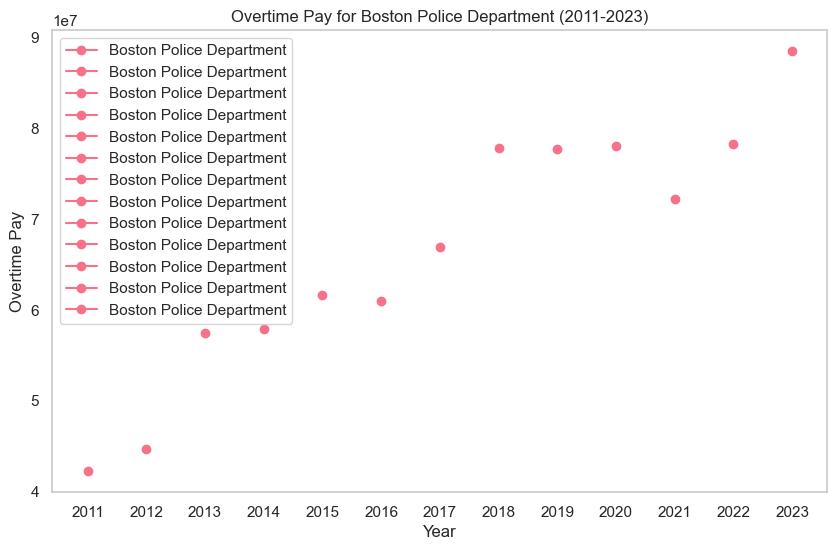

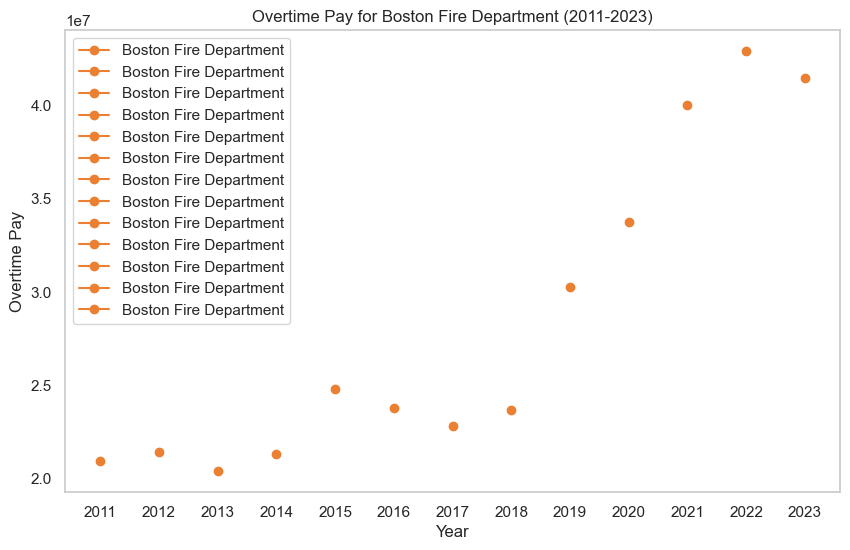

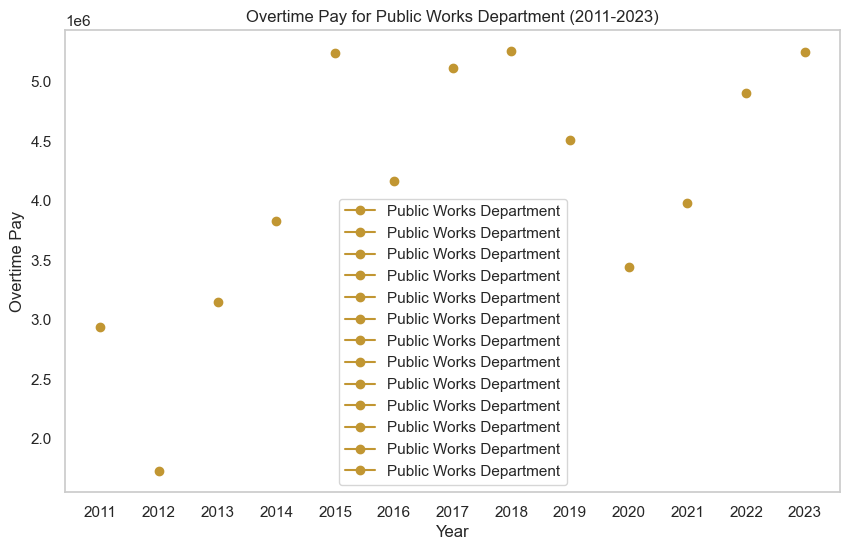

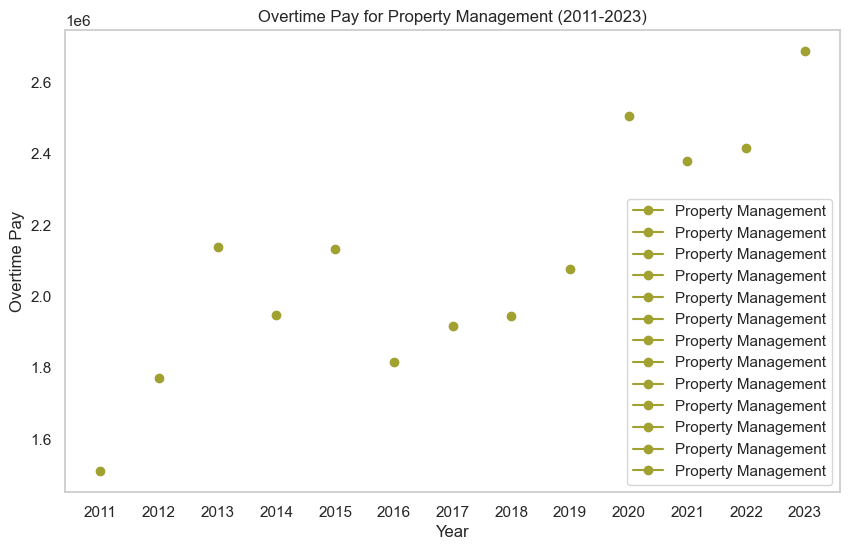

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# draw a line plot for each department, with the year as the x-axis and the overtime pay as the y-axis, each department as a line and has a individual plot. year is the x-axis, and the overtime pay ratio is the y-axis. left side is the neat amount and the right side is the ratio
# only show the line, without the name of the line
def plot_department_overtime(top_department_data):
    # Create a color palette
    palette = sns.color_palette("husl", len(top_department_data))

    # Create a figure and axes for each department
    for i, department in enumerate(top_department_data[2011]['DEPARTMENT_NAME']):
        plt.figure(figsize=(10, 6))

        # Plot the data for each year
        for year, df in top_department_data.items():
            if department in df['DEPARTMENT_NAME'].values:
                plt.plot(year, df[df['DEPARTMENT_NAME'] == department]['OVERTIME'].values[0], marker='o', label=department, color=palette[i])

        plt.title(f"Overtime Pay for {department} (2011-2023)")
        plt.xlabel("Year")
        plt.ylabel("Overtime Pay")
        plt.xticks(years)
        plt.legend()
        plt.grid()
        plt.show()

plot_department_overtime(top_department_data)